In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm, binom
import pandas as pd
import seaborn as sn


# Binomial Distribution

- a discrete probability distribution that has several applications in business contexts. A random variable is said to follow a binomial distribution when:

    a. It can have 2 outcomes: success and failure.
    
    b. Getting x successes out of n trials.
    
    c. Probability p is constant throughout the event.

### Problem statement: SREE CLOTHING is a clothing company selling clothes on a daily basis. It is observed that 10% of their customers return the items for many reasons. On a specific day, 20 customers purchased items from the shop. Calculate:
1. The probability that exactly 5 customers will return the items.
2. The probability that a maximum of 5 customers will return the items.
3. The probability that more than 5 customers will return the items.
4. The average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.

In [6]:
# The probability that exactly 5 customers will return the items.
stats.binom(20, .10).pmf(5)

0.03192136111995428

Text(0.5, 0, 'Number of items returned')

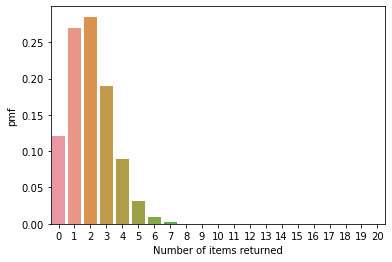

In [11]:
#visualize:
pmf_data = pd.DataFrame({'success' : range(0,21), 'pmf' : list(stats.binom.pmf(range(0,21), 20, 0.1) )})

sn.barplot(x = pmf_data.success, y = pmf_data.pmf)
plt.ylabel('pmf')
plt.xlabel('Number of items returned')

In [7]:
# The probability that a maximum of 5 customers will return the items.
stats.binom(20, .10).cdf(5)

0.988746865835491

In [8]:
# The probability that more than 5 customers will return the items.
stats.binom(20, .10).sf(5)

#or
#1 - stats.binom.cdf(5, 20, 0.1)


0.011253134164509009

In [12]:
#The average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.
mean,var = stats.binom.stats(20, 0.1)
print('Average :', mean, 'Variance :', var)

Average : 2.0 Variance : 1.8


# Poisson Distribution

- It is used in calculating the number of events that may occur over a period of time and space. We need a rate of occurrence denoted by Λ (lambda).

### Problem Statement: The number of cash withdrawals at an ATM follows a Poisson Distribution at 10 withdrawals per hour. Calculate:
1. The probability that a maximum of 5 withdrawals will happen.
2. The probability that a number of withdrawals over a period of 3 hours will exceed 30.

In [13]:
#The probability that a maximum of 5 withdrawals will happen.
stats.poisson(10).cdf(5)

0.06708596287903189

In [20]:
#The probability that a number of withdrawals over a period of 3 hours will exceed 30.
stats.poisson(30).sf(30)

#The total number of events, in this case, is 30. Here the mean number of events is equal to the product of lambda and the time = 3*10 = 30.

0.45164848742208863

Text(0, 0.5, 'pmf')

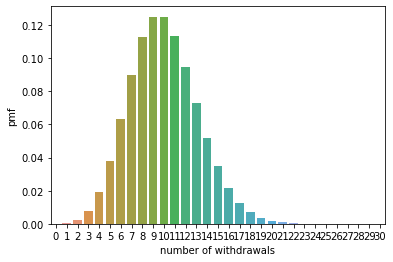

In [21]:
#visualize
pmf_data_poisson = pd.DataFrame({'success' : range(0, 31), 'pmf' : list(stats.poisson.pmf(range(0,31), 10))})


sn.barplot(x = pmf_data_poisson.success, y = pmf_data_poisson.pmf)
plt.xlabel('number of withdrawals')
plt.ylabel('pmf')

# Exponential Distribution

- It is a single parameter continuous probability distribution that is used for modeling the time-to-failure of electronic components or the radioactivity of chemical elements. The random variable here is continuous in nature and occurs independently at a constant average rate.

### Problem statement: The time to failure of a gadget follows an Exponential Distribution with a mean time between failures of 1000 hrs. Calculate:
1. The probability that gadgets will fail before 1000 hrs.
2. The probability that gadgets will not fail up to 2000 hrs.
3. The time by which 10% of the gadget will fail.

In [3]:
# The probability that gadgets will fail before 1000 hrs.

#Solution: 1. The probability that gadgets will fail before 1000 hrs.
#CDF up to 1000 will give the probability of failing before 1000 hrs. 
#The stats.expon.cdf() function takes parameters the number of hrs, the mean, and scale of the exponential distribution.


stats.expon.cdf(1000, 1/1000, 1000)


0.6321201909489326

In [4]:
# The probability that gadgets will not fail up to 2000 hrs.

1 - stats.expon.cdf(2000, 1/1000, 1000)


0.13533541857196352

In [5]:
# The time by which 10% of the gadget will fail.

stats.expon.ppf(0.1, 1/1000, 1000)


105.36151565782632

Text(0, 0.5, 'pdf')

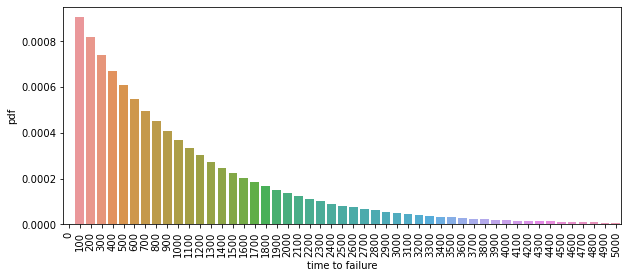

In [6]:
#Visualizing the PDF against various time-to-fail hours ranging from 100 to 5000

pdf_data_expon = pd.DataFrame({'success': range(0, 5100, 100), 'pdf' : stats.expon.pdf(range(0,5100,100), 1/1000, 1000)})
plt.figure(figsize = (10,4))
sn.barplot(x = pdf_data_expon.success, y = pdf_data_expon.pdf)
plt.xticks(rotation = 90)
plt.xlabel('time to failure')
plt.ylabel('pdf')

# Normal Distribution

- It is one of the most popular continuous distributions. It is used in naturally occurring measures like age, salary, sales volume, birth-weight, height, etc.

### Problem Statement: The heights of adult females are normally distributed with mean = 160cm and sd= 8cm.
1. The probability that any randomly selected female has a height greater than 170cm.
2. The probability that any randomly selected female has a height greater than 180cm provided she is tall, tall means height greater than 170cm.


In [7]:
# The probability that any randomly selected female has a height greater than 170cm.
stats.norm(160, 8).sf(170)

#or 1-stats.norm(160,8).cdf(170)

0.10564977366685535

In [8]:
# The probability that any randomly selected female has a height greater than 180cm provided she is tall, tall means height greater than 170cm.

#numerator = probability person is greater than 180.
1- stats.norm(160,8).cdf(180)

0.006209665325776159

In [9]:
#denominator = probability person is greater than 170cm
1- stats.norm(160,8).cdf(170)

0.10564977366685535

In [10]:
#We will use conditional probability here, the probability of the intersection of both the person greater than 170cm and 180cm simultaneously indicate that the person is greater than 180cm. 
#Therefore the intersection of the events implies that the person must be greater than 180cm.

#ans = 
0.006209665325776159/0.10564977366685535

0.058775945373598724

# T-test (one sample):
- The t-test is used when the population standard deviation is unknown.

### Problem Statement: The teacher of the class has high expectations from the students of her class and expects the average score to be 72. And the data follows a normal distribution. Check whether the expectation is correct or not. (alpha = 0.05)
- sol: Here the population mean is 72 and the sd is unknown. Let us consider the hypothesis as — H0: μ=72 H1: μ!=72
- The scipy.stats.ttest_1samp() method is used for this test. It takes 2 parameters- the sample observation and the expected value in the null hypothesis.

# Chi-square goodness of fit test:
- It is used to compare the observed distribution of data with the expected distribution of data to decide whether there is any statistically significant difference between the observed and theoretical distribution. given by -

### Problem statement: 110 visual artists were surveyed to find out their zodiac sign. The results were: Aries (31), Cancer (19), Libra (19), Pisces (23), Capricorn (18). The manager believes that 30% are Aries, 15% are cancer, 20% are libra, 25% is Pisces, and 10% Capricorn. Test the hypothesis that zodiac signs are distributed across visual artists according to the assumption of the manager.
- ans: scipy.stats.chisquare() method is used to check whether the manager is true or false. Takes the parameters — observed frequency, expected frequency.